In [18]:
import pandas as pd #for data processing
import numpy as np #for numerical operations
import seaborn as sns #for statistical visualization
import matplotlib.pyplot as plt #for visualization
import scipy.stats as scp #for mathematical stats
import plotly.express as px #for statistical visualization
from sklearn import preprocessing

In [2]:
vehicles_df = pd.read_csv('vehicles.csv', index_col=0)

In [3]:
vehicles_df.head(100)

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,
7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309798041,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,...,NaN,hatchback,NaN,https://images.craigslist.org/00606_6sZwmmrJ9r...,Looking to sell my 2006 Subaru Impreza hatchba...,NaN,al,32.5475,-85.4682,2021-04-20T09:55:48-0500
7309361405,https://auburn.craigslist.org/cto/d/valley-one...,auburn,https://auburn.craigslist.org,80,2004.0,honda,NaN,excellent,6 cylinders,gas,...,NaN,NaN,NaN,https://images.craigslist.org/00p0p_awopHVeMR8...,Asking $800 Loaded 2004 Honda Accord EX-L! 94k...,NaN,al,32.8113,-85.1749,2021-04-19T12:55:06-0500
7309271279,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,...,NaN,hatchback,blue,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.4800,2021-04-19T10:51:13-0500


In [4]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           426880 non-null  object 
 1   region        426880 non-null  object 
 2   region_url    426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          425675 non-null  float64
 5   manufacturer  409234 non-null  object 
 6   model         421603 non-null  object 
 7   condition     252776 non-null  object 
 8   cylinders     249202 non-null  object 
 9   fuel          423867 non-null  object 
 10  odometer      422480 non-null  float64
 11  title_status  418638 non-null  object 
 12  transmission  424324 non-null  object 
 13  VIN           265838 non-null  object 
 14  drive         296313 non-null  object 
 15  size          120519 non-null  object 
 16  type          334022 non-null  object 
 17  paint_color   296677 non-null  obje

In [5]:
vehicles_df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
vehicles_df.describe(include='object')

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://newyork.craigslist.org/que/ctd/d/holli...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12


In [7]:
vehicles_df.drop(['url','region','region_url','county','VIN','drive','size','paint_color','image_url','description',
                 'state','lat','long','posting_date'
                  ,'cylinders','title_status'], axis=1, inplace=True)

In [8]:
vehicles_df.head(100)

,price,year,manufacturer,model,condition,fuel,odometer,transmission,type
id,,,,,,,,,
7222695916,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7218891961,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7221797935,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7222270760,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7210384030,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7309798041,2100,2006.0,subaru,impreza,fair,gas,97000.0,automatic,hatchback
7309361405,80,2004.0,honda,NaN,excellent,gas,94020.0,automatic,NaN
7309271279,15990,2016.0,NaN,Scion iM Hatchback 4D,good,gas,29652.0,other,hatchback


In [9]:
new_vehicles_df = vehicles_df.dropna()

In [10]:
new_vehicles_df.head(100)

,price,year,manufacturer,model,condition,fuel,odometer,transmission,type
id,,,,,,,,,
7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,good,gas,57923.0,other,pickup
7316814758,22590,2010.0,chevrolet,silverado 1500,good,gas,71229.0,other,pickup
7316814989,39590,2020.0,chevrolet,silverado 1500 crew,good,gas,19160.0,other,pickup
7316743432,30990,2017.0,toyota,tundra double cab sr,good,gas,41124.0,other,pickup
7316356412,15000,2013.0,ford,f-150 xlt,excellent,gas,128000.0,automatic,truck
...,...,...,...,...,...,...,...,...,...
7305672266,0,2019.0,chevrolet,express cargo van,like new,gas,69125.0,automatic,van
7305672252,0,2018.0,chevrolet,express cargo van,like new,gas,66555.0,automatic,van
7305666455,38990,2020.0,infiniti,qx60 luxe sport utility,good,gas,5279.0,other,other


<AxesSubplot:xlabel='year'>

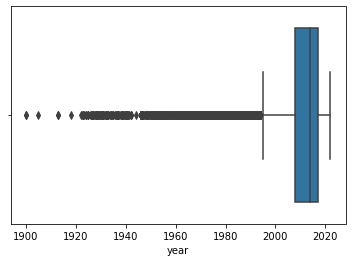

In [11]:
sns.boxplot(x=new_vehicles_df['year'])

<AxesSubplot:xlabel='year'>

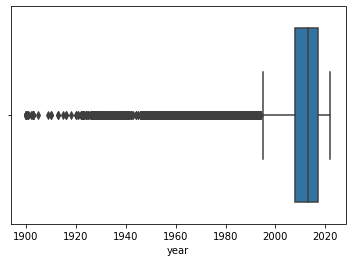

In [12]:
sns.boxplot(x=vehicles_df['year'])

In [13]:
new_vehicles_df.sort_values(by=['price','year'])

,price,year,manufacturer,model,condition,fuel,odometer,transmission,type
id,,,,,,,,,
7315896091,0,1927.0,ford,model t,excellent,gas,10000.0,manual,truck
7313902907,0,1929.0,ford,model a pick up,excellent,gas,1.0,automatic,pickup
7311094030,0,1931.0,ford,model a,good,gas,1234.0,manual,sedan
7316514472,0,1939.0,dodge,coe,new,gas,6100.0,automatic,truck
7316517778,0,1939.0,dodge,coe,new,gas,6100.0,automatic,truck
...,...,...,...,...,...,...,...,...,...
7314339777,123456789,1999.0,buick,regal,like new,gas,96000.0,automatic,sedan
7315524207,123456789,2015.0,chevrolet,cruze,like new,gas,64181.0,automatic,sedan
7308010868,135008900,2008.0,nissan,titan se kingcab,like new,gas,110500.0,automatic,truck


In [14]:
new_vehicles_df.head()

,price,year,manufacturer,model,condition,fuel,odometer,transmission,type
id,,,,,,,,,
7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,good,gas,57923.0,other,pickup
7316814758,22590,2010.0,chevrolet,silverado 1500,good,gas,71229.0,other,pickup
7316814989,39590,2020.0,chevrolet,silverado 1500 crew,good,gas,19160.0,other,pickup
7316743432,30990,2017.0,toyota,tundra double cab sr,good,gas,41124.0,other,pickup
7316356412,15000,2013.0,ford,f-150 xlt,excellent,gas,128000.0,automatic,truck


In [17]:
new_vehicles_df = new_vehicles_df.iloc[:,1:-1]
new_vehicles_df.head()

,manufacturer,model,condition,fuel,odometer
id,,,,,
7316814884,gmc,sierra 1500 crew cab slt,good,gas,57923.0
7316814758,chevrolet,silverado 1500,good,gas,71229.0
7316814989,chevrolet,silverado 1500 crew,good,gas,19160.0
7316743432,toyota,tundra double cab sr,good,gas,41124.0
7316356412,ford,f-150 xlt,excellent,gas,128000.0


In [22]:
label_encoder = preprocessing.LabelEncoder()
new_vehicles_df.iloc[:,0] = label_encoder.fit_transform(new_vehicles_df.iloc[:,0]).astype('float64')

In [23]:
corr = new_vehicles_df.corr()

In [24]:
pd.get_dummies(new_vehicles_df.drop(["model"], axis=1),drop_first=True)

,manufacturer,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
id,,,,,,,,,,,
7316814884,14.0,57923.0,0,1,0,0,0,0,1,0,0
7316814758,7.0,71229.0,0,1,0,0,0,0,1,0,0
7316814989,7.0,19160.0,0,1,0,0,0,0,1,0,0
7316743432,38.0,41124.0,0,1,0,0,0,0,1,0,0
7316356412,13.0,128000.0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7301591192,30.0,32226.0,0,1,0,0,0,0,1,0,0
7301591187,40.0,12029.0,0,1,0,0,0,0,1,0,0
7301591147,6.0,4174.0,0,1,0,0,0,0,0,0,0


In [25]:
X = pd.get_dummies(new_vehicles_df.drop(["model"], axis=1),drop_first=True)
y = new_vehicles_df["model"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

MemoryError: could not allocate 13973323776 bytes

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns, filled=True);